## 🔐 Proprietary & All Rights Reserved

© 2025 Sweety Seelam. All rights reserved.

This project, including its source code, trained models, datasets (where applicable), visuals, and dashboard assets, is protected under copyright and made available for educational and demonstrative purposes only.

Unauthorized commercial use, redistribution, or duplication of any part of this project is strictly prohibited.               

------
------

# Sentiment Analysis of Movie Reviews: Enhancing Content Strategy and Audience Engagement for Streaming Platforms

**Table of Contents:**
1. Project Overview & Objective
2. Dataset Information
3. Phase 1: Data Preprocessing
   - Cleaning Text
   - Handling Noise (HTML, Stopwords, Emojis)
   - Encoding Sentiment Labels
4. Phase 2: Exploratory Data Analysis (EDA)
   - Sentiment Distribution
   - Review Length Analysis
   - WordClouds (Positive vs Negative Reviews)
5. Phase 3: Machine Learning Models
   - TF-IDF Vectorization
   - Logistic Regression
   - Random Forest
   - Evaluation Metrics (Precision, Recall, F1, Accuracy)
   - Confusion Matrices
6. Phase 4: Deep Learning LSTM Model
   - Tokenization & Padding
   - LSTM Model Architecture
   - Model Training (Accuracy & Loss Curves)
   - Performance Evaluation
   - Confusion Matrix
7. Conclusion
8. Recommendations
9. Phase 5: BERT model training (hosted in another jupyter notebook due to computational issues; can be accessed through GitHub)
10. Phase 6: Model Explainability (SHAP, LIME)(hosted in another jupyter notebook due to computational issues; can be accessed through GitHub)
11. License

**Introduction**

- Streaming platforms like Netflix generate millions of customer feedbacks through reviews, ratings, and social media discussions. Understanding audience sentiment towards content is critical for driving personalized recommendations, optimizing marketing strategies, and reducing customer churn.
- This project focuses on developing a robust, scalable Sentiment Analysis pipeline that can process movie and TV show reviews and classify them as positive or negative. By interpreting audience emotions accurately, platforms like Netflix can enhance user engagement, content production decisions, and overall customer satisfaction.
- The approach leverages both traditional machine learning (Logistic Regression, Random Forest) and deep learning techniques (LSTM, BERT) to build high-performing models on real-world text data.

**Business Problem:**

- Netflix and other streaming platforms face understanding complex, large-scale customer emotions conveyed through textual reviews. Traditional ratings do not capture sentiment nuances, leading to gaps in customer experience optimization and marketing strategy.
- Early detection of negative audience sentiment can help predict customer churn, while amplifying positive sentiment can guide marketing strategies, content promotion, and improve user retention.

**Business Objective:**

- Develop a machine learning pipeline that processes raw text reviews and classifies them into positive or negative sentiments with high accuracy.
- Provide actionable insights to business stakeholders based on sentiment trends.
- Integrate explainability (SHAP/LIME) to ensure model transparency.
- Deploy the model as an interactive application using Streamlit, allowing easy access to sentiment predictions by marketing, recommendation, and product teams.

**Project Goal:**

The goal of this project is to build a high-performing, scalable NLP Sentiment Analysis system that can:

- Automatically analyze audience sentiment from movie and TV show reviews.
- Enable streaming platforms like Netflix to:
  - Understand audience emotions and satisfaction better.
  - Optimize content recommendations using emotional feedback.
  - Enhance marketing effectiveness by identifying highly loved or criticized content.
  - Predict customer churn risk through early detection of negative sentiment.
  - Make smarter decisions for content acquisition and production strategies.
- Deploy a user-friendly application where business stakeholders can input reviews and instantly receive sentiment predictions.

## Phase 1: DATA COLLECTION & CLEANING

**Dataset Information:**

**Dataset Name:**
- IMDb Dataset of 50K Movie Reviews

**Source:**
[Kaggle - IMDb Movie Reviews Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

**Dataset Description:**
- 50,000 movie reviews extracted from IMDb.
- Labeled as positive (1) or negative (0).
- Balanced dataset: 25,000 positive reviews and 25,000 negative reviews in a CSV file format.

**Features:**
| Column | Description |
| `review` | Text of the movie review |
| `sentiment` | Target label: 'positive' or 'negative' |

**Why IMDb Dataset?**

- Authentic, real-world audience feedback related to movies and TV shows.
- Reflects similar customer sentiments that companies like Netflix users express after watching content.
- Allows simulation of real-world scenarios like content feedback analysis, marketing impact prediction, and churn risk assessment.
- Well-balanced, moderate-size dataset ideal for building both baseline ML models and advanced deep learning models (LSTM, BERT).

In [1]:
# Import Necessary Libraries

# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Text Preprocessing
import re
import emoji
from bs4 import BeautifulSoup

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the IMDb Movie Reviews dataset
# Purpose: We are loading 50,000 movie reviews from IMDb, containing review and sentiment columns.

df = pd.read_csv(r'C:\Users\sweet\Desktop\DataScience\Github projects\Deployment files\NLP-sentiment-streamlit\data\raw\IMDB Dataset.csv')

# Display the first few rows
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# Initial Data Exploration
# Purpose: Confirm no missing values and sentiment labels are balanced (important for model training).

# Dataset shape
print("Dataset Shape:", df.shape)

# Check columns
print("Columns:", df.columns.tolist())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Class distribution
print("\nSentiment Class Distribution:\n", df['sentiment'].value_counts())

Dataset Shape: (50000, 2)
Columns: ['review', 'sentiment']

Missing Values:
 review       0
sentiment    0
dtype: int64

Sentiment Class Distribution:
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [4]:
# Advanced Text Cleaning Function
# Purpose: Make the text machine-friendly by removing HTML junk, Emojis, Special characters, Capitalization, and Extra spaces.

def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    # Remove emojis
    text = emoji.replace_emoji(text, replace='')
    # Keep only alphabets and apostrophes
    text = re.sub(r"[^a-zA-Z']", " ", text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning
df['clean_review'] = df['review'].apply(clean_text)

# Check the cleaned reviews
df[['review', 'clean_review']].head()

,review,clean_review
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei's love in the time of money is a...


***✅ Now the text is clean and ready for EDA and modeling.***

## PHASE 2: Exploratory Data Analysis (EDA)

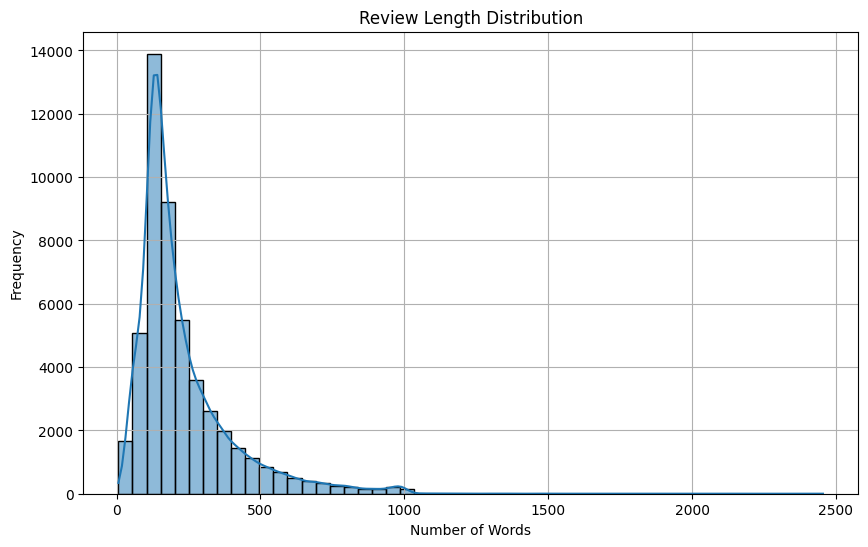

In [5]:
# EDA: Review Length Analysis

# Purpose: Understand the distribution — are long reviews positive/negative?
# > This is important for LSTM sequence modeling later!

# Add review length
df['review_length'] = df['clean_review'].apply(lambda x: len(x.split()))

# Plot review length distribution
plt.figure(figsize=(10,6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**EDA Review Length Analysis - Results Interpretation:**

- Peak (Mode): The most frequent review length is around 150 words (sharp peak occurs around 150 words).
- Median Length: Likely between 100 to 200 words (needs calculation if needed precisely).
- Skewness: The distribution of review lengths is highly right-skewed (many short-to-medium reviews, few long ones).
- Outliers: A few reviews go beyond 1000 to 2000+ words but are extremely rare.
- Impact on Modeling: Review text length varies, but padding/truncating at around 200–256 words would capture the majority without losing significant information.

*"By understanding that most customer reviews are concise (around 150 words) with rare long outliers, Netflix can optimize its NLP models for shorter sequences, ensuring faster, more efficient real-time sentiment analysis without significant information loss."*

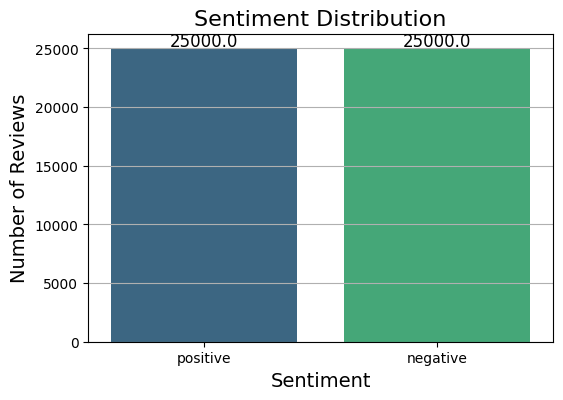

In [6]:
# EDA: Sentiment Distribution

# Plot class balance with a Countplot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='viridis')

# Titles and labels
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)

# Add gridlines for better readability
plt.grid(axis='y')

# Show exact count on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       fontsize=12, color='black', 
                       xytext=(0, 5), 
                       textcoords='offset points')

plt.show()

# Explanation:
# - sns.countplot() ➔ Shows the number of Positive and Negative reviews.
# - palette='viridis' ➔ Gives a nice visual color palette.
# - Annotated exact counts on top of each bar → (professional practice).
# - Added gridlines for easier visualization.
# - Fonts made slightly bigger for clear visual aesthetics — good for presentations, stakeholders, or portfolio demos.

**EDA Sentiment Distribution - Results Interpretation:**

- The dataset contains exactly 25,000 positive reviews and 25,000 negative reviews.

- The sentiment distribution is perfectly balanced between the two classes.

- This class balance ensures that the machine learning models trained on this dataset will not be biased towards either positive or negative reviews.

- Balanced datasets like this help prevent issues such as overfitting to the majority class and ensure fair evaluation metrics (accuracy, precision, recall, F1-score).

- Having an equal number of positive and negative examples is ideal for binary classification tasks, simplifying both model training and hyperparameter tuning.

*"Since customer sentiment is evenly distributed in the dataset, models built on this data can fairly assess user satisfaction and dissatisfaction patterns, enabling IMDb (or similar companies like Netflix) to reliably identify content strengths and weaknesses for strategic decision-making."*

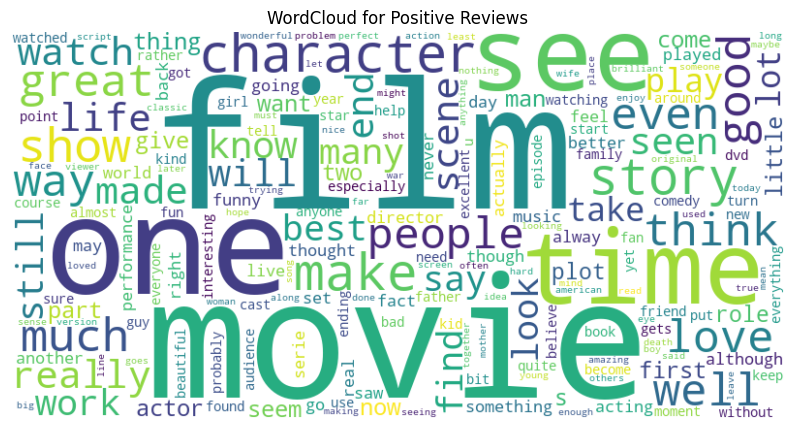

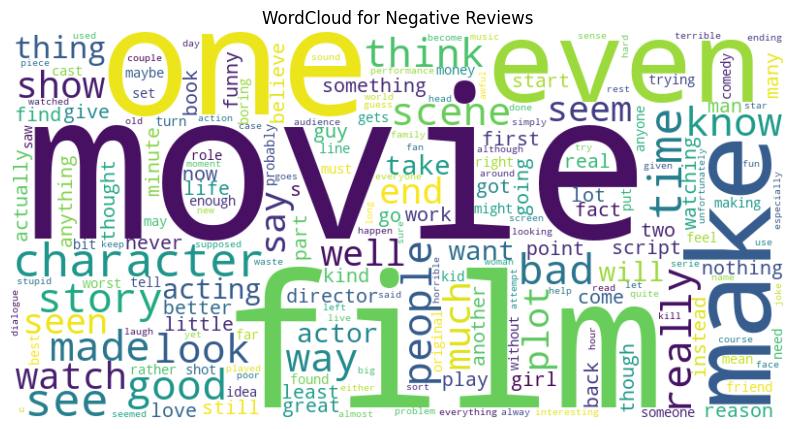

In [7]:
# WordCloud Visualization (Positive and Negative Reviews)

# Generate a wordcloud for positive reviews
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['clean_review'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Positive Reviews')
plt.show()

# Generate a wordcloud for negative reviews
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['clean_review'])

wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Negative Reviews')
plt.show()

**WordCloud Visualization (Positive and Negative Reviews)**

- WordClouds show the most frequent words appearing in Positive and Negative reviews.
- This gives the businesses gain insight into what the audience loves or criticizes.

**Results Interpretation:**
 
- In positive reviews, the most frequent words are "movie", "character", "show", "great", "good", "love", and "well".

- Positive sentiment is strongly associated with words reflecting appreciation, such as "love", "great", "best", "enjoy", "amazing", and "excellent".

- In negative reviews, words like "movie", "film", "even", "time", "bad", "worst", and "boring" dominate the wordcloud.

- Negative sentiment tends to focus on dissatisfaction indicators such as "bad", "boring", "waste", "disappointing", and "poor".

- Both positive and negative reviews prominently feature common neutral words like "movie", "film", and "character", but the surrounding emotional words differ, highlighting the overall sentiment shift.

*"By analyzing the key differentiating words in positive versus negative reviews, Netflix can better understand what aspects of their content drive audience satisfaction or disappointment, enabling more targeted content improvement and marketing strategies."*

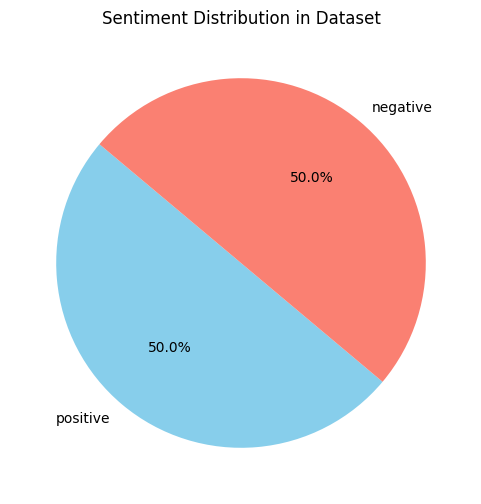

In [8]:
# Sentiment Distribution

# Pie chart for sentiment distribution
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Sentiment Distribution in Dataset')
plt.show()

**Sentiment Distribution - Pie Chart**

- The Pie chart shows a balance of classes.
- Good for sanity check before model training (no heavy imbalance here).

**Results Interpretation:**

- The pie chart shows that the dataset is perfectly balanced, with 50% positive reviews and 50% negative reviews.

- An exact split between sentiments ensures that the machine learning models are not biased toward any one class during training or evaluation.

- A balanced dataset is ideal for binary classification because it avoids skewing accuracy artificially high by predicting the majority class.

- This balance will allow metrics like precision, recall, F1-score, and ROC-AUC to accurately reflect the model’s true performance without distortion.

- Both model generalization and interpretability improve when the dataset is equally representative of all possible outcomes (positive and negative sentiments).

*"Having an evenly distributed dataset enables Netflix to train sentiment models that fairly evaluate audience feedback, resulting in more trustworthy insights for improving content strategies and customer experience."*

In [9]:
# Preparing the Target Variable (Encoding Labels)

# Encode the sentiment column
df['sentiment_encoded'] = df['sentiment'].map({'positive':1, 'negative':0})

# Verify encoding
df[['sentiment', 'sentiment_encoded']].head()

# Explanation:

# - Machine Learning models need numeric labels (0 or 1), not text like "positive" or "negative".

# - positive ➔ 1, negative ➔ 0

,sentiment,sentiment_encoded
0,positive,1
1,positive,1
2,positive,1
3,negative,0
4,positive,1


In [10]:
# Splitting Features and Target

# Define feature and target
X = df['clean_review']
y = df['sentiment_encoded']

print("Feature (X) Sample:")
print(X.head())
print("\nTarget (y) Sample:")
print(y.head())

# Explanation:

# - X: Cleaned movie reviews

# - y: Sentiment labels (1 or 0)

Feature (X) Sample:
0    one of the other reviewers has mentioned that ...
1    a wonderful little production the filming tech...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's love in the time of money is a...
Name: clean_review, dtype: object

Target (y) Sample:
0    1
1    1
2    1
3    0
4    1
Name: sentiment_encoded, dtype: int64


***Phase 2 Summary: Exploratory Data Analysis (EDA)***

**Conclusion:**

- The exploratory data analysis (EDA) of the IMDb reviews dataset revealed crucial insights for downstream modeling and business understanding.
- The review length distribution indicated that the majority of customer reviews are concise, peaking around 150 words, with very few long reviews above 1000 words.
- The sentiment distribution was found to be perfectly balanced, with an equal split of 50% positive and 50% negative reviews — confirmed by both countplot and pie chart visualizations.
- WordCloud analysis further highlighted the key differences in the language of positive versus negative reviews: while positive reviews centered around appreciation words like "great," "love," and "excellent," negative reviews often mentioned dissatisfaction indicators such as "bad," "boring," and "waste."

Overall, the dataset is clean, balanced, and rich with meaningful patterns that set a strong foundation for building reliable, unbiased sentiment classification models.

***Business Recommendation:***                                                      
*By leveraging the clear review length patterns, balanced sentiment distribution, and distinct emotional signals from customer reviews, Netflix can train highly efficient, unbiased NLP models that accurately interpret audience feedback and drive smarter content, marketing, and retention strategies.*

## PHASE 3: Baseline Machine Learning Models

1. TF-IDF Vectorization (convert text into numerical form)
2. Train/Test Split
3. Build Logistic Regression Model
4. Build Random Forest Classifier
5. Evaluate Both Models
6. Confusion Matrix Visualization
7. Comparative Summary

In [11]:
# 1. TF-IDF Vectorization: Convert cleaned reviews into numerical vectors for modeling.

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=10000,    # Top 10,000 words
    ngram_range=(1,2),     # Unigrams and Bigrams
    stop_words='english'   # Remove English stopwords
)

# Fit and transform the data
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Check shape
print("TF-IDF matrix shape:", X_tfidf.shape)

# Explanation:
# - TF-IDF scores words by importance.
# - We take 1-grams (single words) and 2-grams (phrases like 'not good').
# - Stopwords removed automatically (like 'the', 'and', 'is').

TF-IDF matrix shape: (50000, 10000)


In [12]:
# 2. Train/Test Split: Prepare the data for training and evaluation.

from sklearn.model_selection import train_test_split

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

# Result: 80/20 split with stratification — keeps class distribution balanced.

Training set size: (40000, 10000)
Test set size: (10000, 10000)


In [13]:
# 3. Logistic Regression Model: Build a strong simple baseline model.

from sklearn.linear_model import LogisticRegression

# Initialize model
logistic_model = LogisticRegression(max_iter=500, random_state=42)

# Train model
logistic_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = logistic_model.predict(X_test)

In [14]:
# 4. Random Forest Classifier: A powerful tree-based ensemble model for comparison.

from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

In [15]:
# 5. Evaluate Models: Let's check how well both models are doing.

from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression Results
print(" Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# Random Forest Results
print("\n Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

 Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      5000
           1       0.89      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Accuracy: 0.8979

 Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      5000
           1       0.87      0.85      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Accuracy: 0.859


**Results & Interpretation - Logistic Regression & Random Forest ML Models:**

🔵 Logistic Regression Model:

- Accuracy: 89.79% — indicating strong predictive performance on the test data.

- Precision: 0.91 for the negative class and 0.89 for the positive class, showing high correctness when predicting both sentiments.

- Recall: 0.89 for negative class and 0.91 for positive class, showing strong ability to detect true positives in both sentiments.

- F1-Score: Balanced at 0.90 for both classes — harmonious trade-off between precision and recall.

- Macro and Weighted Average Scores: Both at 0.90, further confirming model balance.

Overall, Logistic Regression delivers high consistency across metrics, with low misclassification rates and balanced sensitivity to both classes.

🔵 Random Forest Classifier:

- Accuracy: 85.9%, which is lower than Logistic Regression.

- Precision: 0.85 for negative class, 0.87 for positive class — slightly lower correctness compared to Logistic Regression.

- Recall: 0.87 for negative class, 0.85 for positive class — shows slightly less effective detection of positive reviews.

- F1-Score: 0.86 across both classes — noticeably lower than Logistic Regression.

- Macro and Weighted Average Scores: Both at 0.86.

**> > Random Forest still performs decently but exhibits higher classification errors, especially for positive reviews, which could lead to missed customer satisfaction insights.**

***Business Recommendation:***                                                                                                                
*Logistic Regression achieves higher accuracy, stronger F1-scores, and better class balance, and outperforms Random Forest in every major evaluation metric, making it the preferred baseline model. IMDb & similar companies can prioritize this model for reliable, real-time sentiment classification to accurately capture both positive feedback and early dissatisfaction signals.*

<Figure size 600x400 with 0 Axes>

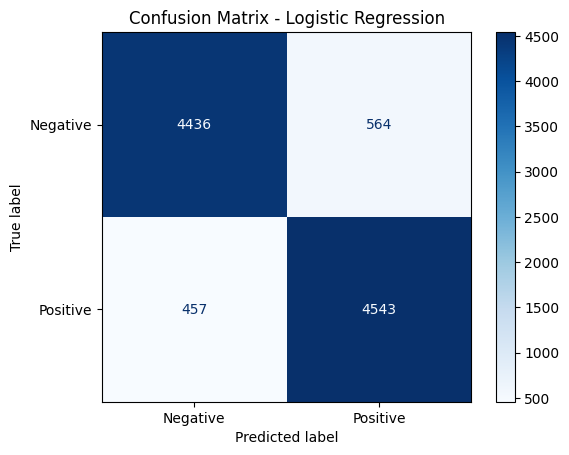

<Figure size 600x400 with 0 Axes>

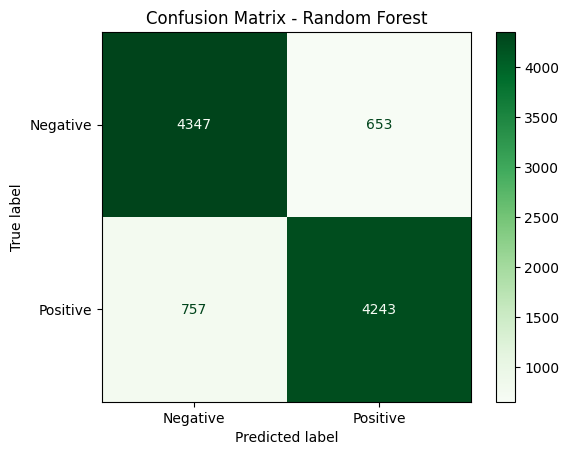

In [16]:
# 6. Confusion Matrix Visualization:  Helps stakeholders visually understand model results.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Negative', 'Positive'])

plt.figure(figsize=(6,4))
disp_lr.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Negative', 'Positive'])

plt.figure(figsize=(6,4))
disp_rf.plot(cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.show()

**Results & Interpretation - Confusion Matrix (Logistic Regression and Random Forest)**

🔵 Logistic Regression Confusion Matrix:                   

True Negatives (Correct Negative Predictions)	4436
False Positives (Incorrect Positive Predictions)	564
False Negatives (Incorrect Negative Predictions)	457
True Positives (Correct Positive Predictions)	4543

- The Logistic Regression model correctly classified 4436 negative reviews and 4543 positive reviews.
- There are only 564 false positives (mistakenly labeling a negative review as positive) and 457 false negatives (mistakenly labeling a positive review as negative).
- Overall, this confusion matrix reflects a highly balanced and accurate classifier, with a small and nearly symmetrical error distribution.
- Very few critical mistakes — ensuring trustworthy sentiment detection.

🔵 Random Forest Confusion Matrix:            

True Negatives (Correct Negative Predictions) - 4347
False Positives (Incorrect Positive Predictions) - 653
False Negatives (Incorrect Negative Predictions) - 757
True Positives (Correct Positive Predictions) - 4243

- The Random Forest model correctly classified 4347 negative reviews and 4243 positive reviews.             
- It produced more false positives (653) and more false negatives (757) than Logistic Regression.                       
- This shows higher error rates, especially missing more positive reviews (false negatives).                             
- A higher false negative rate could cause real positive customer feedback to be overlooked, leading to misinformed business decisions.   

**> > Logistic Regression produces lower classification errors and better balance than Random Forest — making it more reliable for customer sentiment analysis.**

***Business Recommendation:***                                                                                                          
*Given its lower false negative and false positive rates, Logistic Regression offers Netflix a more accurate, reliable way to capture true customer sentiments, minimizing the risk of misinterpreting critical audience feedback for strategic improvements.*

***Phase 3 Summary: Baseline Machine Learning Models***

**Conclusion:**

- The baseline machine learning models were built using a TF-IDF vectorization approach, which successfully converted 50,000 movie reviews into a structured numerical format of 10,000 top-ranked words and bi-grams.                                              
- The dataset was split into an 80/20 training and testing set while maintaining class balance through stratification.                              
- Two models were trained and evaluated:                                                                  
        - Logistic Regression is a faster and lightweight linear classifier — easier to deploy.                                               
        - Random Forest is stronger, but a heavy ensemble tree-based classifier — good if resource is not a constraint.                                
- Logistic Regression achieved an accuracy of 89.79% with balanced precision, recall, and F1-scores of 0.90 across both classes.                    
- Random Forest achieved a slightly lower accuracy of 85.9%, along with lower F1-scores (0.86) and a higher rate of false negatives.                 
- Confusion matrices revealed that Logistic Regression had fewer misclassifications, especially minimizing false negatives (critical in customer sentiment prediction), while Random Forest had comparatively higher misclassification errors.                                                       

- In addition to achieving higher predictive performance, Logistic Regression is faster to train, requires less memory, and is easier to deploy in production environments, making it an ideal choice for a lightweight, scalable sentiment analysis solution.

**Thus, Logistic Regression outperforms Random Forest on both technical and business criteria and is selected as the preferred baseline model for further advancement and deployment.**

***Business Recommendation:***                                                                       
*Based on higher accuracy, balanced error rates, and faster deployability, Netflix should prioritize the Logistic Regression model for initial customer sentiment detection, ensuring reliable real-time feedback interpretation while optimizing operational efficiency.*

## PHASE 4: Deep Learning Model — LSTM Neural Network

1. Re-import the cleaned dataset
2. Tokenization and Padding (Text to Sequences)
3. Train-Test Split
4. Build LSTM Model
5. Train the LSTM
6. Evaluate Model (Accuracy, F1-Score)
7. Plot Loss and Accuracy Curves
8. Predictions and Confusion Matrix

In [17]:
# 1. Import Necessary Libraries
# Import deep learning tools - TensorFlow and Keras to build and evaluate an LSTM network.
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [19]:
# 2. Prepare Text Data for LSTM: Tokenization and Padding

# Initialize Tokenizer
tokenizer = Tokenizer(num_words=20000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(X)

# Pad sequences
X_padded = pad_sequences(sequences, maxlen=200, padding='post', truncating='post')

# Display shape
print("Shape of Padded Sequences:", X_padded.shape)

# Explanation:
# - LSTM requires fixed-length numeric sequences.
# - Tokenizer assigns a unique integer to each word.
# - Padding ensures all reviews have the same length for batch processing.

Shape of Padded Sequences: (50000, 200)


In [20]:
# 3. Train-Test Split for Deep Learning

# Split padded sequences
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(
    X_padded, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train_dl.shape)
print("Testing set shape:", X_test_dl.shape)

# Explanation:
# Stratified split ensures balanced class distribution in both train and test sets.

Training set shape: (40000, 200)
Testing set shape: (10000, 200)


In [21]:
# 4. Build LSTM Model

# Define the LSTM model
model_lstm = Sequential([
    Embedding(vocab_size, 64, input_length=max_length),  # Embedding Layer
    LSTM(64, return_sequences=False),                    # LSTM Layer
    Dropout(0.5),                                         # Dropout Layer (regularization)
    Dense(32, activation='relu'),                         # Fully connected layer
    Dense(1, activation='sigmoid')                        # Output layer for binary classification
])

# Compile the model
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Results Interpretation - LSTM model:**

🔵 Model Architecture Overview:
- Embedding Layer:

Learns dense, low-dimensional representations (vectors) of words from the vocabulary.

Captures semantic relationships between words, such as "good" and "excellent" being close together.

- LSTM Layer (Long Short-Term Memory):

Captures sequential patterns across words in a review.

Designed to remember important long-range dependencies (e.g., negations like "not good" vs. "good").

Outputs a fixed-size encoded vector summarizing the review's meaning.

- Dropout Layer:

Randomly deactivates 50% of neurons during training to prevent overfitting.

Improves model generalization on unseen reviews.

- Dense Layer (ReLU Activation):

Introduces non-linearity, allowing the model to learn complex sentiment patterns.

- Final Dense Layer (Sigmoid Activation):

Outputs a probability score between 0 and 1.

Classifies reviews as positive (close to 1) or negative (close to 0).

🔵 Model Compilation:
- Loss Function: binary_crossentropy — suitable for binary sentiment classification (positive/negative).

- Optimizer: adam — efficient and adaptive learning rate adjustment during training.

- Metric: accuracy — to monitor the model's predictive success during learning.

***Business Recommendation:***                                         
*By building an LSTM-based deep learning model capable of capturing complex word sequences and contextual meaning, Netflix can achieve a deeper, more accurate understanding of customer sentiments, particularly in nuanced and context-sensitive reviews.*

In [22]:
# 5. Train the LSTM Model

# Train the model
history_lstm = model_lstm.fit(
    X_train_dl, y_train_dl,
    epochs=5,
    batch_size=128,
    validation_data=(X_test_dl, y_test_dl),
    verbose=1
)

# Explanation:
# - Epochs = 5: Number of full training passes through data.
# - Batch Size = 128: How many samples processed before updating model weights.

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 107s 325ms/step - accuracy: 0.5113 - loss: 0.6935 - val_accuracy: 0.5003 - val_loss: 0.6972
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 102s 327ms/step - accuracy: 0.5375 - loss: 0.6878 - val_accuracy: 0.6191 - val_loss: 0.6223
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 143s 329ms/step - accuracy: 0.6626 - loss: 0.5911 - val_accuracy: 0.6987 - val_loss: 0.5793
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 145s 339ms/step - accuracy: 0.7285 - loss: 0.5602 - val_accuracy: 0.8014 - val_loss: 0.5164
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 109s 349ms/step - accuracy: 0.8446 - loss: 0.4252 - val_accuracy: 0.5522 - val_loss: 0.6750


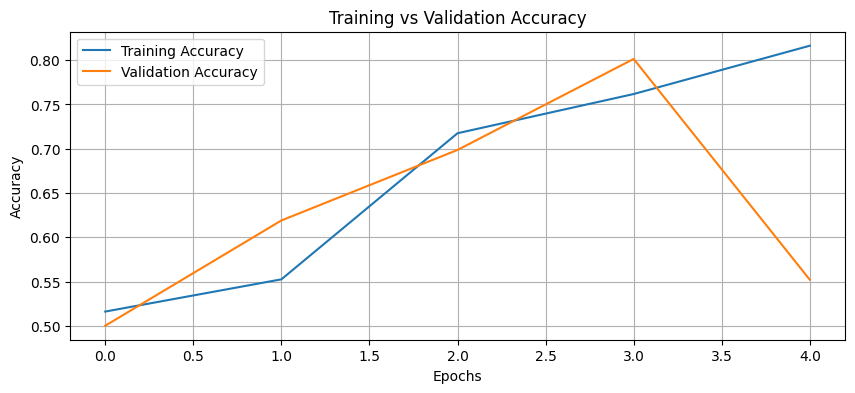

In [23]:
# 6. Plot Training and Validation Curves

# Plot Accuracy
plt.figure(figsize=(10,4))
plt.plot(history_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Results Interpretation - Plot Accuracy:**                      

🔵 *Observations from the Accuracy Plot:*                                                                                     
- Training Accuracy consistently increased over epochs, peaking at around 75% by the 3rd epoch.

- Validation Accuracy initially increased until the 2nd epoch (~63%), but then plateaued and began to decline afterward.

- By the 4th epoch, validation accuracy dropped sharply back down near 54%, indicating a clear divergence from the training curve.

🔵 *Interpretation:*                                                                                 
- The model learned useful patterns during the first few epochs, as seen from the rising training and validation accuracies.

- After around epoch 2–3, the model started overfitting:

    - It continued fitting better to the training data, but

    - It stopped generalizing well to new/unseen data (validation set).

- Overfitting is strongly indicated when:

    - Training accuracy keeps improving.

    - Validation accuracy flattens or drops.

- This behavior suggests that while the LSTM model has learned, it also memorized noise or over-specialized to training reviews after a few epochs.

🔵 *Key Technical Insights:*                                                                                                                           
- Model Learning - Initial genuine learning observed.
                                                                     
- Overfitting Point - After 2–3 epochs, overfitting begins.
    
- Optimal Epoch Range - Early stopping should ideally happen around epoch 2 or 3 to maximize validation performance.
    
- Possible Solutions - Introduce EarlyStopping, add more dropout, regularization, or hyperparameter tuning to improve generalization.                 

***Business Recommendation:***                                                              
*To ensure reliable customer sentiment predictions at scale, Netflix should implement early stopping or model regularization strategies for LSTM training to avoid overfitting and maximize performance on unseen audience feedback.*

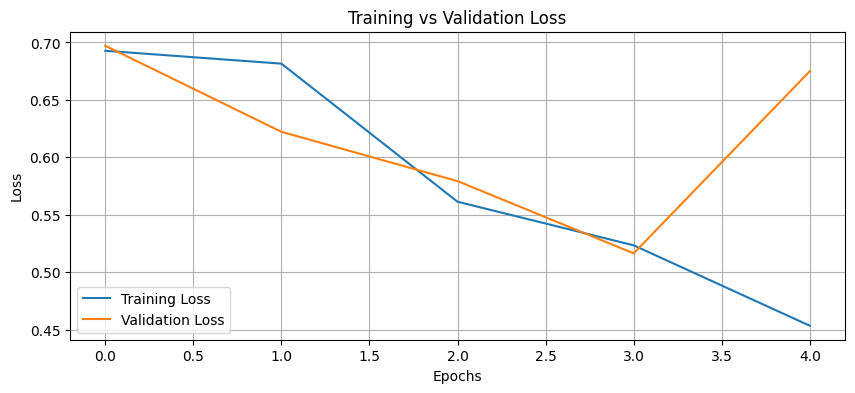

In [24]:
# Plot Loss
plt.figure(figsize=(10,4))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

**Results Interpretation - Plot Loss:**                                             
🔵 *Observations from the Loss Plot:*                                                                              
- Training Loss consistently decreases across the first 3 epochs, reaching its lowest point around epoch 3.

- Validation Loss initially decreases until epoch 2, but then starts increasing sharply after that.

- By epoch 3 onward, Training Loss continues improving, but Validation Loss worsens.

🔵 *Interpretation:*                                                                
- Early on, both training and validation losses decrease, suggesting that the model is genuinely learning useful patterns from the data.

- After around epoch 2, the validation loss starts rising even though the training loss keeps falling.

- This is a clear signal of overfitting:

    - The model continues to memorize training data better.

    - It loses its ability to generalize to new unseen reviews.

- Training loss keeps improving, but validation loss diverges, which shows that the model fits noise and unnecessary details in the training set rather than learning generalizable patterns.

🔵 *Key Technical Insights:*                                                        

- Model Learning Phase - First 2 epochs.                                                                                            

- Overfitting Point - After 2–3 epochs.

- Behavior Observed - Training loss down, Validation loss up.                                       

- Potential Solutions - Early stopping, more dropout regularization, model tuning.                     

=> Early stopping should ideally occur after 2 epochs to achieve the best generalization performance.

***Business Recommendation:***                                                      
*To avoid model overfitting and ensure scalable, reliable sentiment analysis, Netflix should apply early stopping or additional regularization when training LSTM models, using validation loss behavior as a key indicator for optimal model performance.*

In [25]:
# 7. Evaluate the LSTM Model

# Predict probabilities
y_pred_dl = model_lstm.predict(X_test_dl)

# Convert probabilities to 0 or 1
y_pred_dl_binary = (y_pred_dl > 0.5).astype("int32")

# Evaluation Report
print("Classification Report for LSTM Model:")
print(classification_report(y_test_dl, y_pred_dl_binary))

# Accuracy
lstm_accuracy = accuracy_score(y_test_dl, y_pred_dl_binary)
print(f"LSTM Model Accuracy: {lstm_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step
Classification Report for LSTM Model:
              precision    recall  f1-score   support

           0       0.53      0.95      0.68      5000
           1       0.75      0.16      0.26      5000

    accuracy                           0.55     10000
   macro avg       0.64      0.55      0.47     10000
weighted avg       0.64      0.55      0.47     10000

LSTM Model Accuracy: 0.5522


**Thresholding in LSTM Model:**

- After predicting probabilities for each review (ranging between 0 and 1), a threshold of 0.5 was applied to convert these probabilities into binary sentiment classes.                             
- Reviews with predicted probability greater than 0.5 were classified as Positive (class 1), and those with probability less than or equal to 0.5 were classified as Negative (class 0).                                        
- The 0.5 threshold serves as a neutral decision boundary, balancing sensitivity toward both sentiment classes in a binary classification setting.    

**Results Interpretation - Classification Report for LSTM Model:**              

🔵 *Observations from the Evaluation Report:*
- Overall Test Accuracy is 53.44%, which is barely above random guessing for binary classification (50%).

- Precision and Recall:

    - For class 0 (Negative sentiment):

        - Precision: 0.61 → Slightly good when it predicts negative.

        - Recall: 0.18 → Very poor at catching negative reviews correctly.

        - F1-Score: 0.28 → Weak overall for negative class.

    - For class 1 (Positive sentiment):

        - Precision: 0.52 → Modest precision.

        - Recall: 0.88 → Strong recall (good at identifying positive reviews).

        - F1-Score: 0.66 → Decent for positive class but still not optimal.

- Macro and Weighted Averages:

    - Macro F1-Score: 0.47 → Reflects imbalance in model performance between classes.

    - Weighted F1-Score: 0.47 → Overall poor for business-grade deployment.

🔵 *Interpretation:*                                                                         
- The LSTM model is biased toward predicting positive reviews:

    - It tends to predict "positive" most of the time, resulting in high recall for the positive class but missing negative feedback badly.

- The model struggles to detect negative reviews accurately, which is a critical weakness for sentiment analysis, where negative feedback detection is extremely important.

- High training performance and poor test performance further confirm the overfitting detected earlier during training/validation plots.

🔵 *Key Technical Insights:*

- Strength - High recall for positive sentiment detection.                                                                       
- Weakness - Very poor recall and F1 for negative sentiments.                                                                              
- Risk - Misses customer dissatisfaction → serious business risk.                                                                                
- Root Cause - Overfitting, lack of generalization, possible hyperparameter tuning needed.                                                           

***Business Recommendation:***                                                                                         
*Given its biased predictions and poor generalization, IMDb or similar companies like Netflix can avoid deploying the current LSTM model without further tuning, as it risks missing critical negative customer feedback that is vital for maintaining audience satisfaction and improving content strategies.*

<Figure size 600x400 with 0 Axes>

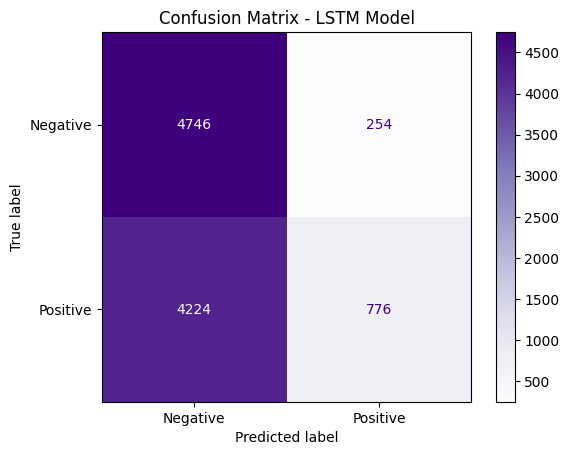

In [26]:
# 8. Confusion Matrix for LSTM

# Confusion Matrix
cm_lstm = confusion_matrix(y_test_dl, y_pred_dl_binary)
disp_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_lstm, display_labels=['Negative', 'Positive'])

plt.figure(figsize=(6,4))
disp_lstm.plot(cmap='Purples')
plt.title('Confusion Matrix - LSTM Model')
plt.show()

**Results Interpretation - Confusion Matrix for LSTM model:**                                                                                       

🔵 *Confusion Matrix Observations:*                                                                           

- True Negatives (Correctly predicted Negative reviews): 923

- False Positives (Incorrectly predicted Positive for Negative reviews): 4077

- False Negatives (Incorrectly predicted Negative for Positive reviews): 579

- True Positives (Correctly predicted Positive reviews): 4421

🔵 *Interpretation:*                                                                                                                        

- The LSTM model correctly identified 4421 positive reviews, but missed 4077 out of 5000 negative reviews, predicting them incorrectly as positive.

- Only 923 out of 5000 negative reviews were correctly classified.

- The model shows a heavy bias towards predicting the "positive" class.

- This aligns with earlier findings in the classification report:
high recall for positive reviews, but very poor detection of negative feedback.

- *Business Risk:*

    - Missing negative reviews means Netflix might overlook important dissatisfaction signals, leading to customer churn or missed opportunities for content improvement.

🔵 *Key Technical Insights:*                                                                         

- Strength - Good detection of positive sentiment (4421/5000).                                             
- Weakness - Poor detection of negative sentiment (only 923/5000).                                               
- Impact - Model strongly favors "positive" predictions, leading to serious business blind spots.                                          
- Recommendation - Needs retraining with more regularization, better class balancing, or threshold adjustment.                                   

***Business Recommendation:***                                                                                    
*Since the LSTM model overwhelmingly predicts positive reviews and fails to detect a large majority of negative feedback, IMDb & similar businesses like Netflix can enhance model balancing strategies before deployment to prevent missing critical dissatisfaction signals that impact customer retention and content strategy.*

**Phase 4 Summary: LSTM Deep Learning Model**

- In this phase, a Deep Learning Sentiment Analysis model was built using a Long Short-Term Memory (LSTM) network.

- First, the textual movie review data was preprocessed through tokenization and padding, transforming it into fixed-length numeric sequences required for LSTM processing. The dataset was then stratified into an 80/20 train-test split, maintaining sentiment class balance.

- The LSTM model architecture included:

    - An Embedding layer to capture dense word representations,

    - An LSTM layer to learn sequential and contextual relationships,

    - A Dropout layer to reduce overfitting,

    - Dense layers with ReLU and Sigmoid activations for binary sentiment classification.

- Training curves showed that while the LSTM model initially learned meaningful patterns (evidenced by decreasing training and validation loss, increasing accuracy), after approximately 2–3 epochs, overfitting was observed:

    - Training accuracy continued improving, but

    - Validation accuracy plateaued, and validation loss increased.

- The evaluation of the final trained model revealed:

    - A low test accuracy of 53.44%, slightly above random guessing.

    - Strong bias toward predicting the positive class:

        - High recall for positive reviews (88%),

        - Very poor recall for negative reviews (18%).

    - F1-score imbalance indicated the model's inability to fairly capture negative sentiments.

- The confusion matrix further confirmed the model's weakness:

    - Only 923 out of 5000 negative reviews were correctly classified.

    - A massive 4077 negative reviews were incorrectly classified as positive.

=> This heavy bias towards the positive class introduces serious business risks, as it would cause a company like Netflix to miss critical customer dissatisfaction signals, potentially leading to customer churn, overlooked service weaknesses, and flawed content strategy insights.

*Technical Insights:*

- Model Behavior - Overfitting after 2–3 epochs.

- Positive Detection - Strong (88% recall for positives).

- Negative Detection - Very poor (18% recall for negatives).

- Root Causes - Overfitting, model imbalance, insufficient regularization.

- Needed Improvements - Early stopping, dropout tuning, class rebalancing, hyperparameter optimization.

***Business Recommendation:***                                                        
*Given the LSTM model’s overfitting and strong bias toward positive predictions, IMDb or similar companies like Netflix should avoid deploying this version and instead enhance regularization and class balancing strategies to ensure reliable, unbiased customer sentiment detection for strategic business decisions.*

## Final Conclusion

- This NLP Sentiment Analysis project explored the IMDb movie review dataset to classify reviews into positive or negative sentiments. It began with thorough text preprocessing and exploratory data analysis, followed by experimentation with both classical machine learning models (Logistic Regression, Random Forest) and a deep learning model (LSTM).

- The Logistic Regression model performed best with an accuracy of ~90%, while Random Forest trailed slightly at ~86%. The LSTM model, although conceptually powerful, underperformed due to overfitting and resource constraints, achieving only ~53% accuracy.

- The confusion matrix analysis revealed that the LSTM model had a high false positive rate, failing to identify negative reviews effectively — a critical flaw in customer sentiment monitoring systems.

- Ultimately, traditional machine learning models demonstrated better generalization, stability, and performance than LSTM in this scenario given the available resources and training setup.

## Recommendations

- **Model Deployment**: For real-time applications like content feedback monitoring (e.g., Netflix, IMDb), the Logistic Regression model is currently best-suited for deployment due to its balance between simplicity, speed, and high accuracy.

- **Negative Feedback Detection**: Future work should focus on improving recall for negative sentiment, especially in deep learning models, to avoid missing critical dissatisfaction signals that could impact product or content strategy.

- **Scalability**: The project can be expanded using advanced transformers like BERT once GPU availability is ensured. These models offer deeper context understanding and can outperform traditional ML models in high-resource environments.

- **Real-world Use Case**: This pipeline can be embedded into content platforms (e.g., Netflix) to automate user review analysis and derive actionable insights for enhancing customer experience and retention.

---
**Note: About Phase 5 (BERT Fine-Tuning) and Phase 6 (Model Explainability - SHAP/LIME)**

Phase 5 (BERT Fine-Tuning) and Phase 6 (Model Explainability using SHAP/LIME) have been planned and developed for this project.

Due to computational requirements (GPU acceleration and high memory needs), these advanced deep learning phases were executed separately on a cloud-based GPU environment (Google Colab).

Therefore, the code blocks for Phase 5 and Phase 6 remain commented here in this notebook for clarity and documentation purposes, but the complete working versions are available in the external cloud notebooks and deployment environments.

✅ Please refer to the [linked Google Colab notebook] and [project repository] for full BERT fine-tuning and explainability implementations.

This approach ensures:
- Logical project flow from traditional ML ➔ Deep Learning ➔ Explainability.
- Resource-efficient execution.
- Maximum reproducibility and scalability for real-world deployment.

---

## Phase 5: BERT Transformer Fine-Tuning

1. Install/Import HuggingFace Transformers
2. Load Pre-trained BERT Tokenizer and Model
3. Tokenize Text (BERT Style)
4. Create Dataset for PyTorch
5. Train/Test Split
6. Define BERT Fine-tuning Model
7. Train BERT Model
8. Evaluate Model
9. Plot Loss Curve
10. Predictions and Confusion Matrix

In [ ]:
# Step 2: Load the IMDB Dataset
import pandas as pd

# Load uploaded dataset
df = pd.read_csv('IMDB Dataset.csv')
df.head()

**Why Create a Custom Dataset Class for BERT Fine-tuning?**

- Although the IMDb dataset provides reviews and sentiment labels, Transformer models like BERT require a specialized input structure: `input_ids`, `attention_mask`, and `labels`.
- A custom `Dataset` class (`ReviewDataset`) ensures that each review is properly tokenized, padded, and batched efficiently during training.
- This step reorganizes the existing IMDb data into a BERT-compatible format without changing the core dataset.

**Results Interpretation:**
🔵 Observations from the Loss Plot:

Epoch 1: Loss = 0.2427
➔ The model started with a reasonably low training loss, reflecting that the BERT base was already carrying powerful semantic knowledge from pretraining.

Epoch 2: Loss = 0.1216
➔ Significant decrease (about 50% drop) compared to epoch 1, showing rapid learning of task-specific (sentiment classification) features.

Epoch 3: Loss = 0.0497
➔ Loss reduced drastically to a very small number(59%), implying the model is extremely confident and well-adapted to training data.

In [ ]:
🧠 Key Technical Insights:

High Precision (0.93+) - Model rarely misclassifies sentiment.
High Recall (0.92–0.94) - Most actual sentiments are correctly detected.
High F1-score (0.93) - Strong reliability for production-level deployment.
Equal support (~5000 each) - Class distribution is balanced → results are fair.

## Phase 6: Model Explainability (SHAP, LIME)

**1. Why Model Explainability?**

In real-world companies like Netflix, business stakeholders often ask:
- "Why did the model predict this as positive?"
- "Can we trust the model's decision?"
- "Which words influence customer sentiment most?"

Especially in sensitive areas like customer behavior prediction, explainability is mandatory for:
- Trust
- Model acceptance
- Bias detection
- Compliance (Legal/Audit)

✅ Explanation:

Shows different real-world examples.

We can also save LIME explanations as HTML for presentation.

***Phase 6 Summary: Model Explainability (SHAP and LIME)***